# Prerequisite

##### Im using the token classification transformer from huggingface to train my model.

In [1]:
# Mount google drive
# I've created a folder transformer-ner/mit-restaurant-data in my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Token classification transformers from huggingface
#!wget https://raw.githubusercontent.com/huggingface/transformers/v3.1.0/examples/token-classification/run_ner.py
!wget https://raw.githubusercontent.com/huggingface/transformers/v3.1.0/examples/token-classification/utils_ner.py
!wget https://raw.githubusercontent.com/huggingface/transformers/v3.1.0/examples/token-classification/tasks.py

--2023-09-07 15:17:35--  https://raw.githubusercontent.com/huggingface/transformers/v3.1.0/examples/token-classification/utils_ner.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15629 (15K) [text/plain]
Saving to: ‘utils_ner.py’

utils_ner.py        100%[===================>]  15.26K  --.-KB/s    in 0.001s  

2023-09-07 15:17:35 (19.4 MB/s) - ‘utils_ner.py’ saved [15629/15629]

--2023-09-07 15:17:35--  https://raw.githubusercontent.com/huggingface/transformers/v3.1.0/examples/token-classification/tasks.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting 

### ⚠️ I've made some admendments for the `run_ner.py` script. Please use the one in the repo.

In [3]:
# Download Datasets
!wget https://groups.csail.mit.edu/sls/downloads/restaurant/restauranttrain.bio
!wget https://groups.csail.mit.edu/sls/downloads/restaurant/restauranttest.bio

--2023-09-07 15:18:12--  https://groups.csail.mit.edu/sls/downloads/restaurant/restauranttrain.bio
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 759757 (742K)
Saving to: ‘restauranttrain.bio’

restauranttrain.bio 100%[===================>] 741.95K  2.14MB/s    in 0.3s    

2023-09-07 15:18:13 (2.14 MB/s) - ‘restauranttrain.bio’ saved [759757/759757]

--2023-09-07 15:18:13--  https://groups.csail.mit.edu/sls/downloads/restaurant/restauranttest.bio
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155722 (152K)
Saving to: ‘restauranttest.bio’

restauranttest.bio  100%[===================>] 152.07K   762KB/s    in 0.2s    

2023-09-07 15:18:14 (762 KB/s) - ‘restaur

In [4]:
!pip install transformers
!pip install seqeval
!pip install conllu
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=bdd0bb128061b975990bbf16a7a91482060ba33b1fd1caebb84732bc61008547
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 4.8 MB/s eta 0:00:00


In [5]:
# Check whether CUDA is enabled.
import torch
print(torch.cuda.is_available())

True


# Data Understanding

## Example
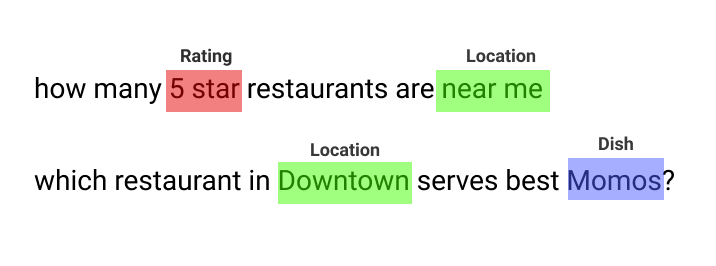

The data is present in the following format

`O`	a  
`B-Rating`	four     
`I-Rating`	star    
`O`	restaurant    
`B-Location`	with  
`I-Location`	a  
`B-Amenity`	bar

# Data Pre-processing

#### Convert dataset to conllu format:
  1. Reverse the tag and column in both test and train dataset.
  2. Replace all the tabs to space.
  3. Change the seperator to newline.


In [6]:
!awk '{print $2,$1}' restauranttest.bio > "/content/drive/My Drive/transformers-ner/mit-restaurant-data/test.txt"
!awk '{print $2,$1}' restauranttrain.bio > "/content/drive/My Drive/transformers-ner/mit-restaurant-data/train.txt"
!sed -i 's/\t/ /g' '/content/drive/My Drive/transformers-ner/mit-restaurant-data/test.txt'
!sed -i 's/^ $/\n/g' '/content/drive/My Drive/transformers-ner/mit-restaurant-data/test.txt'
!sed -i 's/\t/ /g' '/content/drive/My Drive/transformers-ner/mit-restaurant-data/train.txt'
!sed -i 's/^ $/\n/g' '/content/drive/My Drive/transformers-ner/mit-restaurant-data/train.txt'

In [7]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/transformers-ner/mit-restaurant-data/train.txt',sep=' ', header=None)

In [8]:
with open('/content/drive/My Drive/transformers-ner/mit-restaurant-data/labels.txt','w') as fout:
  for tag in df[1].unique():
    fout.write(tag+'\n')

# Model Training

In [9]:
!python run_ner.py  --model_name_or_path 'roberta-base'  \
--data_dir '/content/drive/My Drive/transformers-ner/mit-restaurant-data/' \
--output_dir 'restaurant-model' \
--max_seq_length '128' \
--num_train_epochs 3 \
--per_device_train_batch_size 8 \
--save_steps 1000000 \
--seed 16 \
--do_train \
--do_predict \
--overwrite_output_dir \
--labels "/content/drive/My Drive/transformers-ner/mit-restaurant-data/labels.txt" \
--fp16

2023-09-07 15:19:36.330570: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
09/07/2023 15:19:38 - WARNING - __main__ -   Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: True, 16-bits training: True
09/07/2023 15:19:38 - INFO - __main__ -   Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=False,
do_predict=True,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=True,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fs

### Evaluation
- Loss = 0.2785
- Accuracy Score = 0.9216
- Precision = 0.7916
- Recall value = 0.8223
- F1 Score = 0.8067


In [10]:
from transformers import pipeline
model_name = './restaurant-model'
nlp = pipeline(task="ner", model=model_name, tokenizer=model_name, framework="pt",grouped_entities=True)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [11]:
sequence =["""how many 5 star restaurants are near me.""","Which restaurant in Downtown serves best Momos?"]
nlp(sequence)

[[{'entity_group': 'Rating',
   'score': 0.9947932,
   'word': ' 5 star',
   'start': 9,
   'end': 15},
  {'entity_group': 'Location',
   'score': 0.92389035,
   'word': ' near me',
   'start': 32,
   'end': 39}],
 [{'entity_group': 'Location',
   'score': 0.5181144,
   'word': ' in',
   'start': 17,
   'end': 19},
  {'entity_group': 'Location',
   'score': 0.73874223,
   'word': ' Downtown',
   'start': 20,
   'end': 28},
  {'entity_group': 'Rating',
   'score': 0.9431286,
   'word': ' best',
   'start': 36,
   'end': 40},
  {'entity_group': 'Dish',
   'score': 0.9813941,
   'word': ' Momos',
   'start': 41,
   'end': 46}]]